In [1]:
from qiskit import QuantumRegister, QuantumCircuit, execute
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit import Aer
import numpy as np
from math import sin, cos, atan2
import matplotlib.pyplot as plt
from numpy.linalg import norm,svd

In [2]:
def two_qubit_state(ckt,A):
    A=np.transpose(np.reshape(A,(2,2)))
    U,S,V=np.linalg.svd(A)

    ckt.u3(2*atan2(S[1],S[0]),0,0,0)
    ckt.cx(0,1)
    ckt.unitary(Operator(U), [0])
    ckt.unitary(Operator(np.transpose(V)), [1])
    ckt.barrier()
    
    return ckt

In [3]:
A=np.random.rand(8,4)
A=A/np.linalg.norm(A)
print(A**2,round(np.sum(A**2),2))

U,S,V=np.linalg.svd(A)
print(np.shape(U),np.shape(V))
print(S)

[[3.38649489e-04 2.42869219e-03 8.30614361e-03 9.08777983e-02]
 [3.38197558e-03 3.93466252e-02 1.53439659e-06 1.70967899e-02]
 [6.73939337e-02 9.58137837e-04 2.44100549e-02 6.29296757e-02]
 [1.36992332e-02 4.30020271e-02 2.21582152e-02 3.56915768e-02]
 [2.66485258e-02 1.08858099e-02 7.50859162e-02 3.52565770e-04]
 [3.46347427e-02 3.83494667e-02 6.48879251e-03 5.12838948e-04]
 [7.84568903e-03 3.13783202e-02 5.28114379e-04 4.20567852e-02]
 [9.79815629e-02 9.15070362e-02 1.33668975e-02 9.03558728e-02]] 1.0
(8, 8) (4, 4)
[0.89992089 0.30699647 0.26290983 0.16362754]


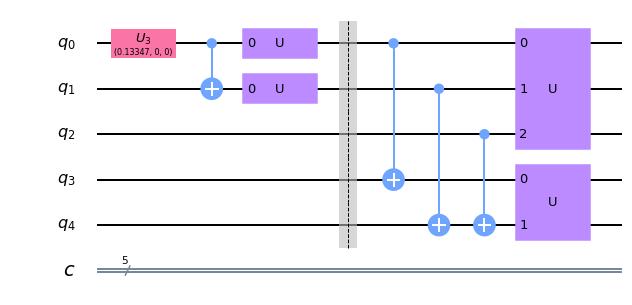

In [8]:
ckt=QuantumCircuit(5,5)
ckt=two_qubit_state(ckt,S)
ckt.cx(0,3)
ckt.cx(1,4)
ckt.cx(2,4)
ckt.unitary(Operator(U), [0,1,2])
ckt.unitary(Operator(np.transpose(V)), [3,4])
#ckt.measure([0,1,2,3],[0,1,2,3])
ckt.draw(output='mpl')

In [9]:
backend = Aer.get_backend('statevector_simulator')
job=execute(ckt,backend)
result = job.result()
outputstate = result.get_statevector(ckt, decimals=3)

print(np.transpose(np.reshape(np.real(outputstate),(4,8))))
print(np.round(A,3),'\n')

[[0.018 0.049 0.091 0.301]
 [0.058 0.198 0.001 0.131]
 [0.26  0.031 0.156 0.251]
 [0.117 0.207 0.149 0.189]
 [0.163 0.104 0.274 0.019]
 [0.186 0.196 0.081 0.023]
 [0.089 0.177 0.023 0.205]
 [0.313 0.303 0.116 0.301]]
[[0.018 0.049 0.091 0.301]
 [0.058 0.198 0.001 0.131]
 [0.26  0.031 0.156 0.251]
 [0.117 0.207 0.149 0.189]
 [0.163 0.104 0.274 0.019]
 [0.186 0.196 0.081 0.023]
 [0.089 0.177 0.023 0.205]
 [0.313 0.303 0.116 0.301]] 



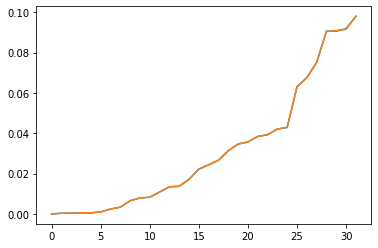

In [10]:
plt.plot(np.sort(np.real(outputstate**2)))
plt.plot(np.sort(np.reshape(A**2,-1)))

In [ ]:
'''backend = Aer.get_backend('qasm_simulator')
job_sim = execute(ckt,backend,shots=100000)
result_sim = job_sim.result()
counts = result_sim.get_counts(ckt)
print(np.round(A**2,3))
plot_state_city(result_sim.get_statevector)'''